# Mall Customer Segmentation
In this notebook, we are given a simple dataset containing information about customers at a mall. Our goal here is to be able to decide a certain target group each customer is a part of. Let's first load in our dataset.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("mall_data.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We can drop the `CustomerID` column since that won't be helping us in our analysis.

In [4]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


We can also change the `Gender` column to be 1 if male and 0 if female.

In [6]:
df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)

## K-means Clustering
Now that our data is set up, we can start with a simple K-means clustering algorithm to try to group our users together.

To determine the number of clusters we should use, we can plot the cost of each number of clusters and use the elbow method based on that graph.

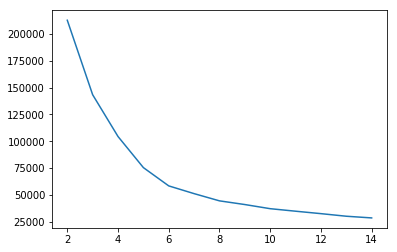

In [32]:
num_clusters = []
wcss = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i, random_state=100)
    kmeans.fit(df)
    num_clusters.append(i)
    wcss.append(kmeans.inertia_)
    
plt.plot(num_clusters, wcss)

The elbow method is a bit hard to distinguish the number of clusters we need since there is no real "elbow" in the graph. Let's try the silhouette method instead to find the optimal number of clusters.

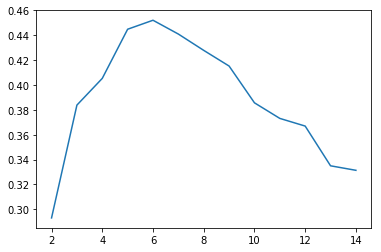

In [36]:
num_clusters = []
silhouette_scores = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i, random_state=100)
    kmeans.fit(df)
    num_clusters.append(i)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))
    
plt.plot(num_clusters, silhouette_scores)

6 clusters has the highest silhouette score, but we are going to use 5 clusters since, after graphing some of the clusters, 5 is the most logical

In [51]:
opt_clusters = 5

In [52]:
kmeans = KMeans(n_clusters=opt_clusters, random_state=100)
kmeans.fit(df)
categories = kmeans.labels_

When plotting `Annual Income` against `Spending Score`, we can see the 5 main groups. In the bottom left, we can see the customers that have little income so they are least likely to have a good spending score. In the upper right, we see customers that have a high income and therefore spend a lot and have a high spending score.

Text(0, 0.5, 'Spending Score (1-100)')

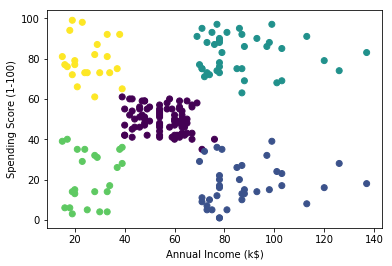

In [55]:
plt.scatter(df.iloc[:, 2], df.iloc[:, 3], c=categories)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')